In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import cm
from matplotlib.ticker import LinearLocator

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Global minimum found considering the initial guess (x,y) = [-2, -1] is: 
 ( 0.08984200982647833 , -0.7126564074687861 )
Global minimum found considering the initial guess (x,y) = [2, 1] is: 
 ( -0.08984201730854155 , 0.7126563988898784 )
Tha value that the function assumes at those points is:  -1.0316284534898772


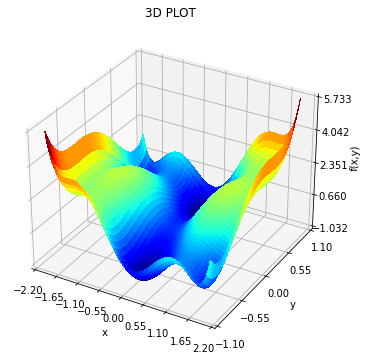

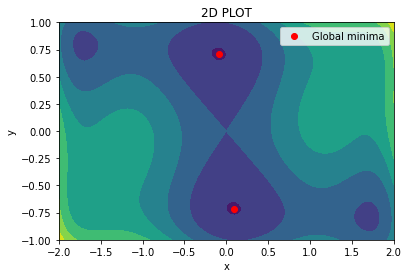

In [11]:
#exercise n.1

def f(x):
    return (4-2.1*pow(x[0],2)+pow(x[0],4)/3)*pow(x[0],2)+x[0]*x[1]+(4*pow(x[1],2)-4)*pow(x[1],2)

x=np.linspace(-2, 2, 10000)
y=np.linspace(-1, 1, 10000)
X, Y=np.meshgrid(x,y)
Z=f([X, Y])

fig=plt.figure(figsize=(9, 6))
ax=fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False)
ax.xaxis.set_major_locator(LinearLocator(9))
ax.yaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_locator(LinearLocator(5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('3D PLOT')

fig1=plt.figure(figsize=(6, 4))
ax1=fig1.add_subplot()
ax1.contourf(x,y,Z)
#fig1.colorbar()
ax1.set_title('2D PLOT')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


#from the 2d plot one can guess that there are 2 global minima. The result provided by the algorithm will depend
#on the initial guess for the minimum position therefore 2 opposite guesses are considered.
#x0->initial guess
x0=[-2,-1]
res1=optimize.minimize(f, x0,method='L-BFGS-B', tol=1e-20)
print('Global minimum found considering the initial guess (x,y) =', x0, 'is: \n (',res1.x[0],',', res1.x[1],')')


x0=[2,1]
res2=optimize.minimize(f, x0,method='L-BFGS-B', tol=1e-20)
print('Global minimum found considering the initial guess (x,y) =', x0, 'is: \n (',res2.x[0],',', res2.x[1],')')


if f([res1.x[0],res1.x[1]])==f([res2.x[0],res2.x[1]]): #prints only if the 2 values correspond
    print('Tha value that the function assumes at those points is: ', f([res1.x[0],res1.x[1]]))
    
ax1.plot(res1.x[0], res1.x[1],'o',label='Global minima', color='red')
ax1.plot(res2.x[0], res2.x[1],'o',label='_nolegend_', color='red')
ax1.legend();

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

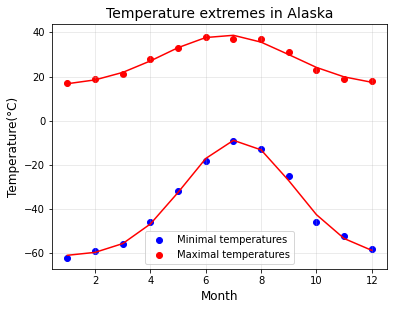

In [27]:
#exercise n.2

from scipy.interpolate import interp1d

list_max=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
list_min=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
min_t=np.asarray(list_min)
max_t=np.asarray(list_max)
months=np.arange(1,13)

fig, ax = plt.subplots(figsize=(6, 4.5))
ax.scatter(months, min_t, color='blue', label='Minimal temperatures')
ax.scatter(months, max_t, color='red', label='Maximal temperatures')
ax.set_title('Temperature extremes in Alaska',  fontsize=14)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Temperature(°C)', fontsize=12)
ax.grid(alpha=0.3)
ax.legend();

#Gaussian fit to describe the data
def gaussian(x, a, x0, sigma, y0):
    return y0+a*np.exp(-pow(x-x0,2)/(2*pow(sigma,2)))

mean_max=sum(months*max_t)/sum(max_t)
sigma_max=np.sqrt(sum(max_t*(months-mean)**2)/sum(max_t))

popt1,pcov1=optimize.curve_fit(gaussian, months, max_t, p0=[max(max_t), mean_max, sigma_max, 20])
ax.plot(months, gaussian(months, *popt1), 'r-', label='Fit maximal temperatures')


mean_min=sum(months*min_t)/sum(min_t)
sigma_min=np.sqrt(sum(min_t*(months-mean)**2)/sum(min_t))

popt2,pcov2=optimize.curve_fit(gaussian, months, min_t, p0=[max(min_t), mean_min, sigma_min, -60])
ax.plot(months, gaussian(months, *popt2), 'r-', label='Fit maximal temperatures')

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

Content of pickle file: 

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])} 



(-4.0, 4.0)

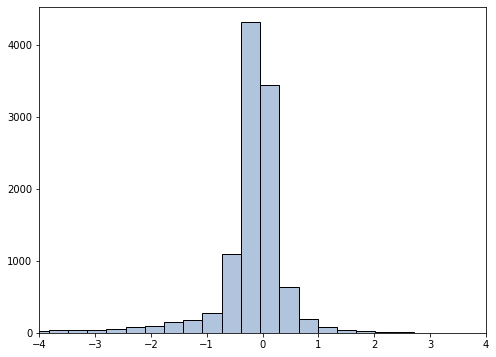

In [50]:
#exercise n.3

#opening pickle file and creating a DataFrame
import pickle
print('Content of pickle file: \n')
infile=open('data/residuals_261.pkl', 'rb')
new_dict=pickle.load(infile)
infile.close()
print(new_dict, '\n')
dictionary=dict(new_dict.item())
df=pd.DataFrame(dictionary)
df

fig=plt.figure(figsize=(8,6))
ax0=plt.subplot()
histo=df.loc[:,'residuals']
h, bins, _=ax0.hist(histo, bins=500,color='lightsteelblue', edgecolor='black', density=False, cumulative=False)
ax0.set_xlim(-4,+4)

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.